In [2]:
import numpy as np
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def prod(w,X):
    return sigmoid(X.dot(w))

def loss(w,X,y,lam):
    z = prod(w,X)
    return -np.mean(y*np.log(z) + (1-y)*np.log(1-z)) + 0.5*lam/X.shape[0]*np.sum(w*w)

In [3]:
def logistic_regression(w_init, X, y, lam = 0.001, lr = 0.1, nepoches = 2000):
# lam - reg paramether, lr - learning rate, nepoches - number of epoches
    N, d = X.shape[0], X.shape[1]
    w = w_old = w_init
    loss_hist = [loss(w_init, X, y, lam)] # store history of loss in loss_hist
    ep = 0
    while ep < nepoches:
        ep += 1
        mix_ids = np.random.permutation(N)
        for i in mix_ids:
            xi = X[i]
            yi = y[i]
            zi = sigmoid(xi.dot(w))
            w = w - lr*((zi - yi)*xi + lam*w)
        loss_hist.append(loss(w, X, y, lam))
        if np.linalg.norm(w - w_old)/d < 1e-6:
            break
        w_old = w
    return w, loss_hist

In [4]:
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50,
2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]]).T
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
# bias trick
Xbar = np.concatenate((X, np.ones((X.shape[0], 1))), axis = 1)
w_init = np.random.randn(Xbar.shape[1])
lam = 0.0001
w, loss_hist = logistic_regression(w_init, Xbar, y, lam, lr = 0.05, nepoches = 500)
print(w)
print(loss(w, Xbar, y, lam))

[ 1.4820024  -4.09738582]
0.40197407236094945


In [17]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Tải dữ liệu MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Chuyển đổi nhãn về dạng số nguyên
X_all = mnist.data
y_all = mnist.target.astype(np.uint8)  # Chuyển đổi về số nguyên

# Lọc các chữ số 0 và 1
X0 = X_all[y_all == 0]  # Chọn tất cả ảnh có nhãn 0
X1 = X_all[y_all == 1]  # Chọn tất cả ảnh có nhãn 1
y0 = np.zeros(X0.shape[0], dtype=np.uint8)  # Gán nhãn 0
y1 = np.ones(X1.shape[0], dtype=np.uint8)   # Gán nhãn 1

# Gộp dữ liệu
X = np.vstack((X0, X1))  # Kết hợp tất cả ảnh
y = np.hstack((y0, y1))  # Kết hợp tất cả nhãn

# Chia tập dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2000, random_state=42)

# Kiểm tra kích thước dữ liệu
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")


Train set: (12780, 784), Test set: (2000, 784)


In [19]:
model = LogisticRegression(C = 1e5)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print("Accuracy %.2f %%" % (100*accuracy_score(y_test, y_pred.tolist())))

Accuracy 99.85 %


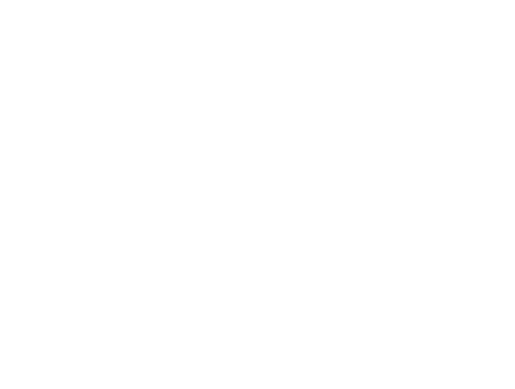

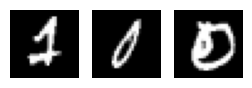

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def display_network(X):
    """Hiển thị một số hình ảnh từ dữ liệu X."""
    m = min(10, X.shape[0])  # Hiển thị tối đa 10 ảnh
    fig, axes = plt.subplots(1, m, figsize=(m, 1))

    for i in range(m):
        ax = axes[i]
        ax.imshow(X[i].reshape(28, 28), cmap="gray")
        ax.axis("off")

    plt.show()
    return fig

# Lấy các mẫu dự đoán sai
mis = np.where((y_pred - y_test) != 0)[0]
Xmis = X_test[mis, :]

# Lưu ảnh vào file PDF
filename = 'mnist_mis.pdf'
with PdfPages(filename) as pdf:
    plt.axis('off')
    fig = display_network(Xmis)  # Gọi hàm đã chỉnh sửa
    pdf.savefig(fig, bbox_inches='tight')
    plt.close(fig)
